___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 6<br><br>Image Classification with CNN<br><br>CIFAR-10 Data<br><h1>

# Dataset Info

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.

Here are the classes in the dataset, as well as 10 random images from each:

![3Dto2D](https://storage.googleapis.com/kaggle-competitions/kaggle/3649/media/cifar-10.png)

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [94]:
# import tensorflow as tf

# tf.config.list_physical_devices("GPU")

# Recognizing and Understanding Data

In [95]:
from tensorflow.keras.datasets import cifar10

# We split the data into train and test sets.

(X_train, y_train), (X_test, y_test) = cifar10.load_data()   # Loading data

In [96]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  50000 images in the training dataset
There are  10000 images in the test dataset


In [97]:
# Checking the shape of one image

X_train[5].shape

(32, 32, 3)

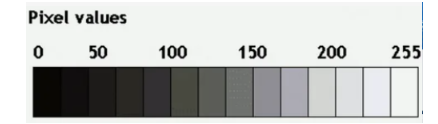

In [98]:
X_train[5]

# resmin pixel degeri, 0= siyah a denk gelir, max beyaz =255

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

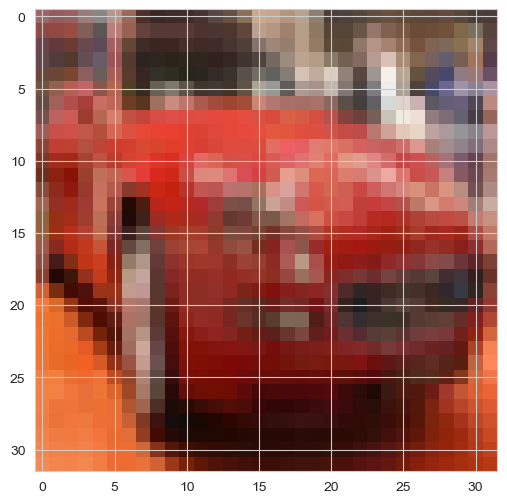

In [99]:
plt.imshow(X_train[5]);

# plt.matshow(X_train[5])

In [100]:
y_train[5]

array([1], dtype=uint8)

In [101]:
y_train.shape

(50000, 1)

In [102]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [103]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

In [104]:
# pd.Series(y_train.flatten()).value_counts()

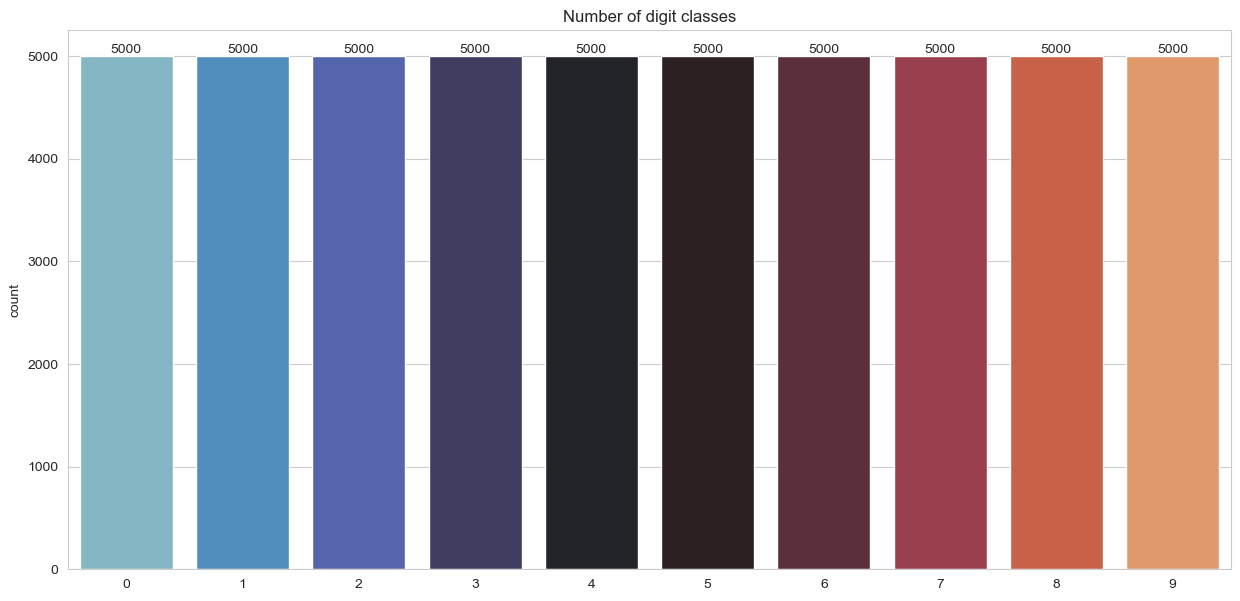

In [105]:
# visualize number of digits classes

plt.figure(figsize=(15,7))
ax = sns.countplot(y_train.flatten(), palette="icefire")
plt.title("Number of digit classes")

for container in ax.containers:
    ax.bar_label(container)

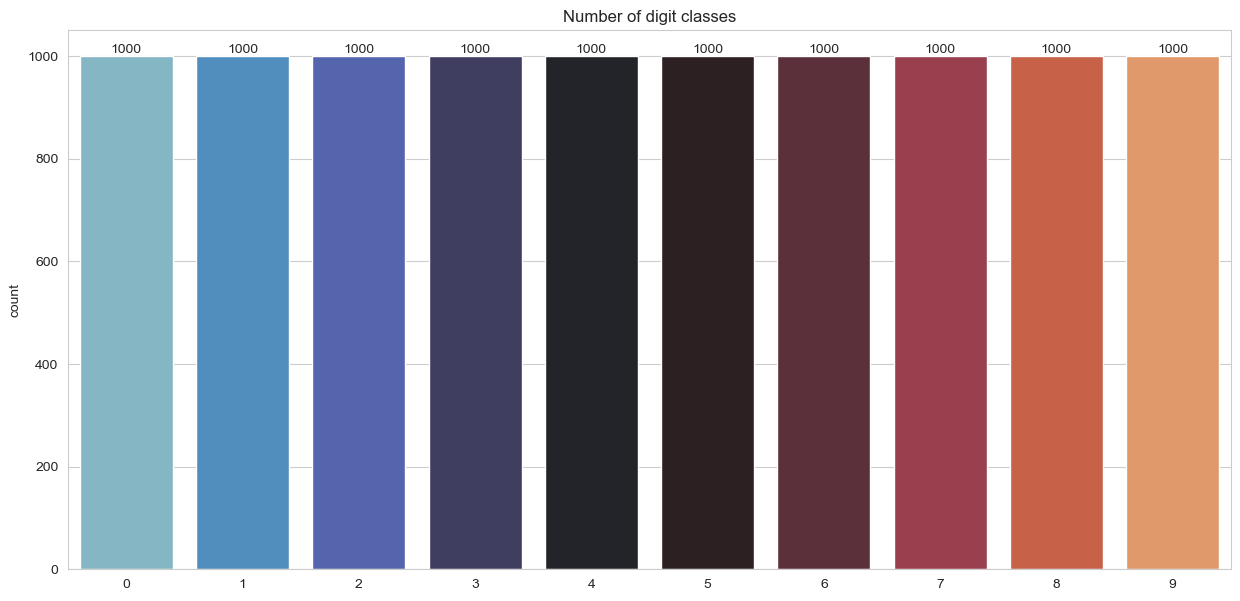

In [106]:
# visualize number of digits classes

plt.figure(figsize=(15,7))
ax = sns.countplot(y_test.flatten(), palette="icefire")
plt.title("Number of digit classes")

for container in ax.containers:
    ax.bar_label(container)

**Class names:**

- 0: Airplane
- 1: Automobile
- 2: Bird
- 3: Cat
- 4: Deer
- 5: Dog
- 6: Frog
- 7: Horse
- 8: Ship
- 9: Truck

In [107]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [108]:
y_train[0]

array([6], dtype=uint8)

In [109]:
classes[y_train[0][0]]

'frog'

In [110]:
classes[int(y_train[0])]

'frog'

In [111]:
#int(np.random.randint(low=0, high=50000, size=1))

In [112]:
#X_train[int(np.random.randint(low=0, high=50000, size=1))]

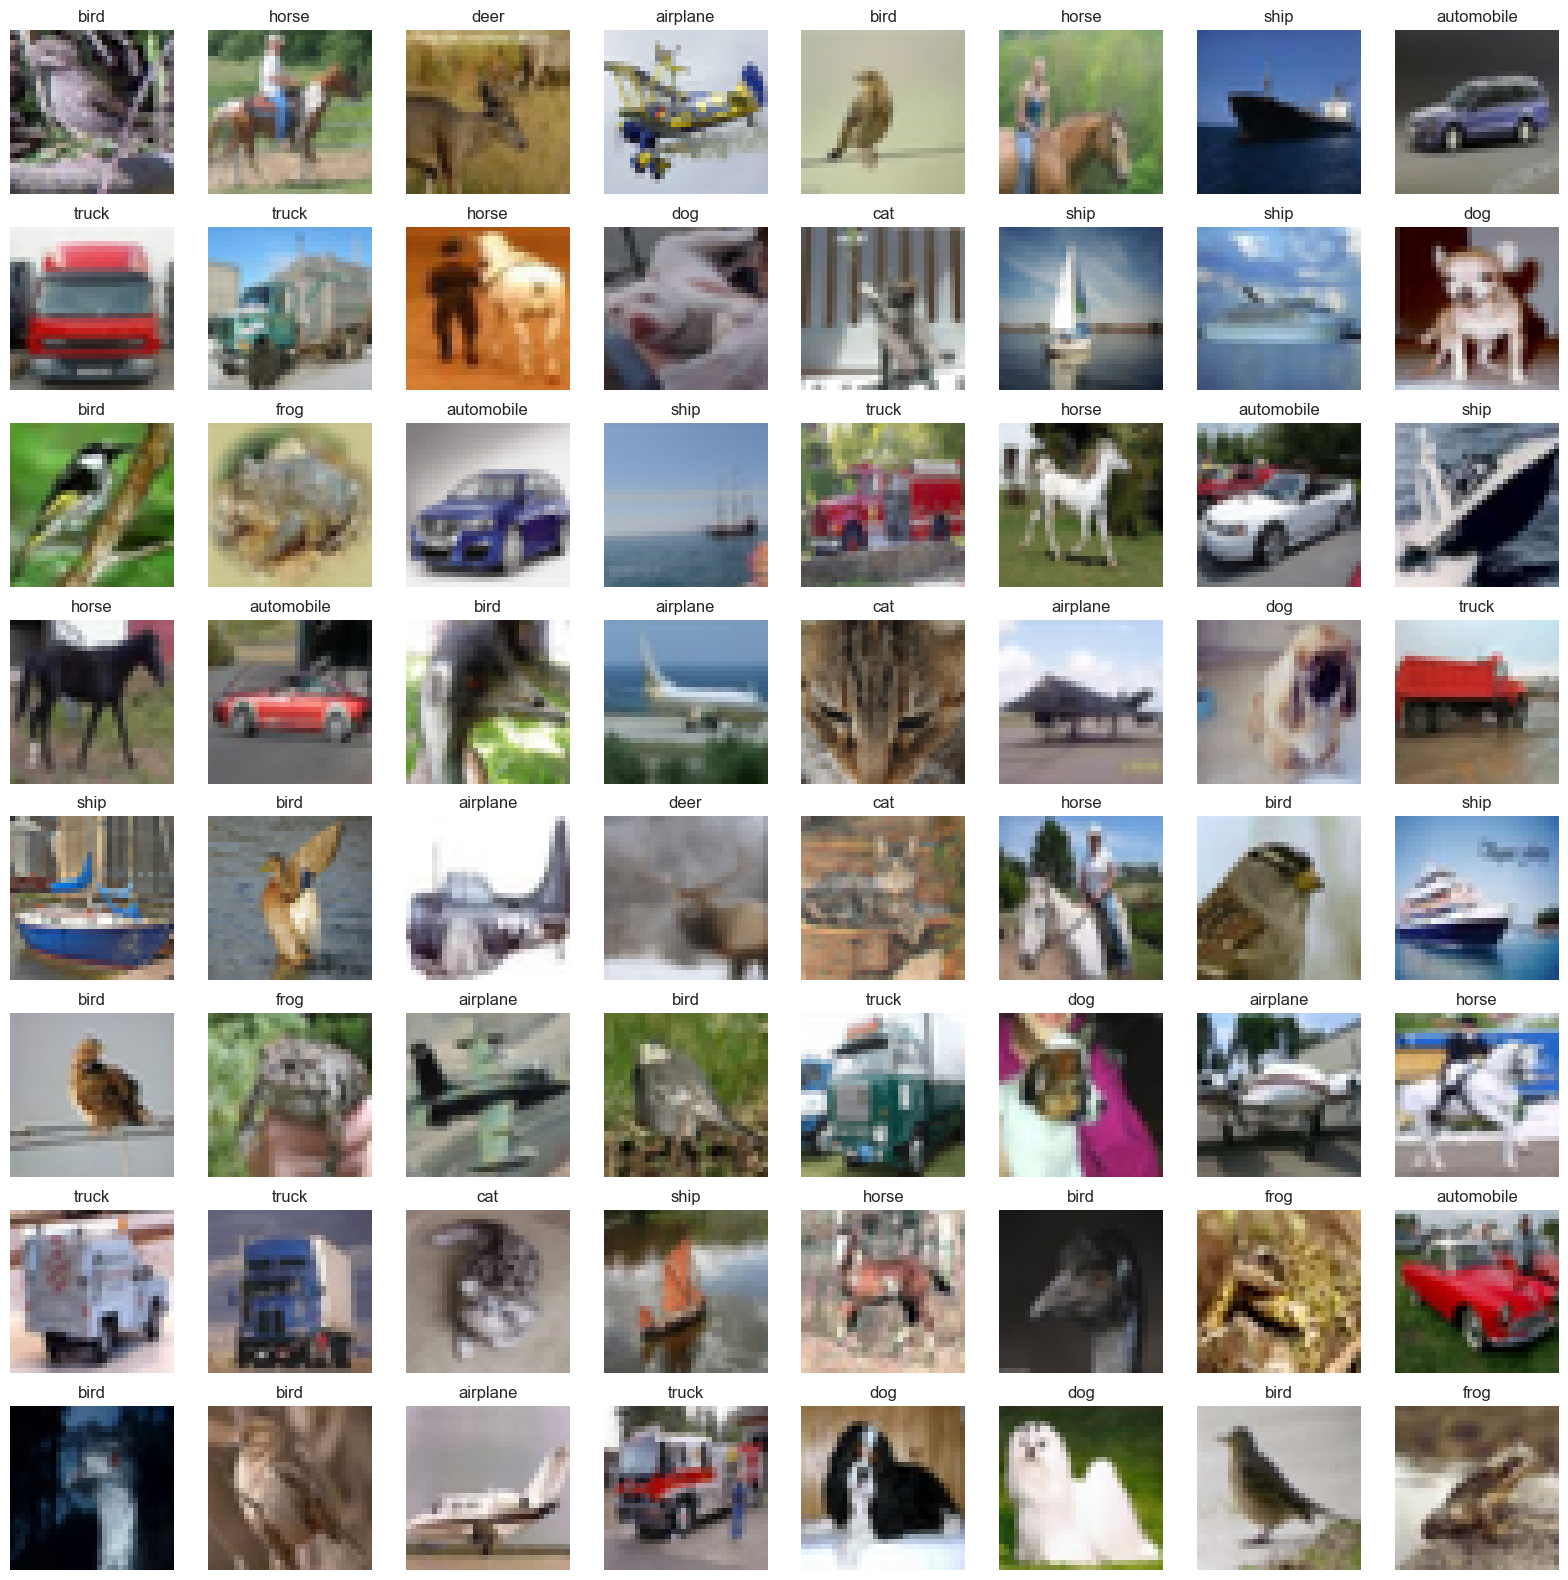

In [113]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

**Normalization**

We perform a grayscale normalization to reduce the effect of illumination's differences.
If we perform normalization, CNN works faster.

In [114]:
X_train[5].min()

0

In [115]:
X_train[5].max()

252

In [117]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# manuel olarak scale etmiş olduk.

In [118]:
X_train[5].min()

0.0

In [119]:
X_train[5].max()

0.9882353

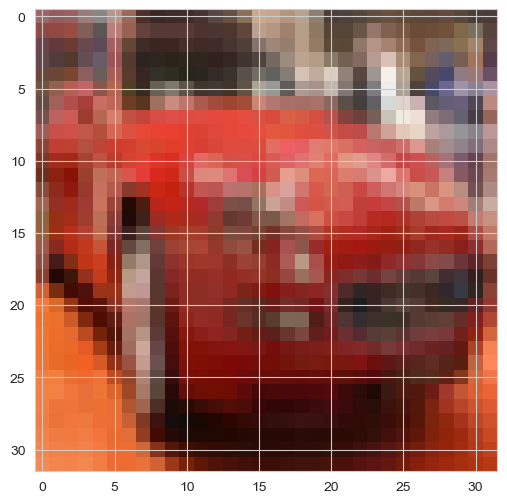

In [120]:
plt.imshow(X_train[5])

In [121]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [122]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

**Label Encoding**

Encode labels to one hot vectors

2 => [0,0,1,0,0,0,0,0,0,0]

4 => [0,0,0,0,1,0,0,0,0,0]

In [59]:
from tensorflow.keras.utils import to_categorical

In [123]:
Y_train = to_categorical(y_train,10) 
Y_test = to_categorical(y_test,10)
Y_test.shape

(10000, 10)

In [133]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [136]:
y_train[0]

array([6], dtype=uint8)

# Modelling-1

In [153]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

# modelimin ihtiyacı olacak layerlerı import ettim. (Dense, Conv2D, MaxPool2D, Flatten)

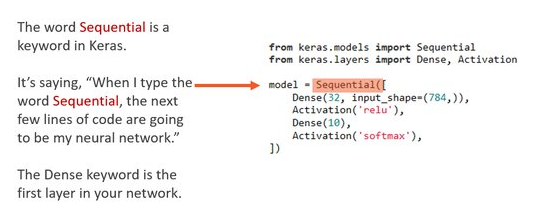

In [154]:
model = Sequential()

# There are two ways to build Keras models: sequential and functional.
# The sequential API allows you to create models layer-by-layer for most problems. 
# It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs.

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'))

# filters: Integer, the dimensionality of the output space (i.e. the number of
#     output filters in the convolution).
# kernel_size: An integer or tuple/list of 2 integers, specifying the height
#     and width of the 2D convolution window. Can be a single integer to specify
#     the same value for all spatial dimensions.
# strides: An integer or tuple/list of 2 integers, specifying the strides of
#     the convolution along the height and width. Can be a single integer to
#     specify the same value for all spatial dimensions. Specifying any stride
#     value != 1 is incompatible with specifying any `dilation_rate` value != 1.
# padding: one of `"valid"` or `"same"` (case-insensitive).
#     `"valid"` means no padding. `"same"` results in padding with zeros evenly
#     to the left/right or up/down of the input such that output has the same
#     height/width dimension as the input.
# activation: Activation function to use. If you don't specify anything, no
#     activation is applied (see `keras.activations`).

model.add(MaxPool2D(pool_size=(2, 2)))

# pool_size: integer or tuple of 2 integers,
#     window size over which to take the maximum.
#     `(2, 2)` will take the max value over a 2x2 pooling window.
#     If only one integer is specified, the same window length
#     will be used for both dimensions.
# strides: Integer, tuple of 2 integers, or None.
#     Strides values.  Specifies how far the pooling window moves
#     for each pooling step. If None, it will default to `pool_size`.
# padding: One of `"valid"` or `"same"` (case-insensitive).
#     `"valid"` means no padding. `"same"` results in padding evenly to
#     the left/right or up/down of the input such that output has the same
#     height/width dimension as the input.

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

# The fully connected layer expects a vector as input. Convolution outputs a series of filters, which each are a grid shape. 
# Flattening specifies a function mapping from these filters to a vector, 
# so you can backpropagate errors back through the convolutional layers.

model.add(Dense(128, activation='relu'))

# Burada DENSE fully connected layer olduğunu gösteriyor

model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

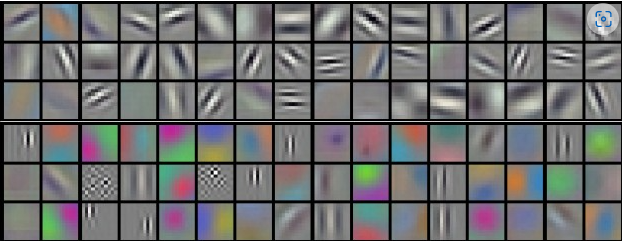

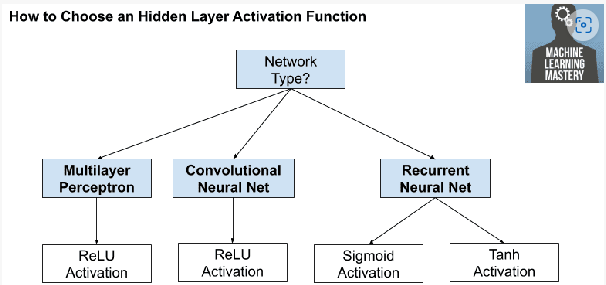

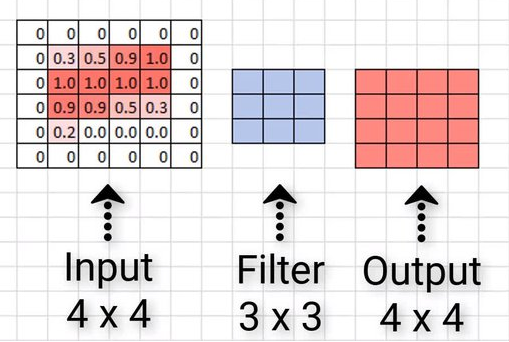

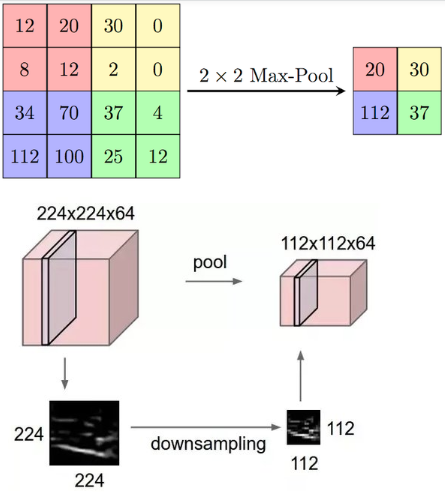

In [155]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               262272    
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [156]:
from tensorflow.keras.callbacks import EarlyStopping

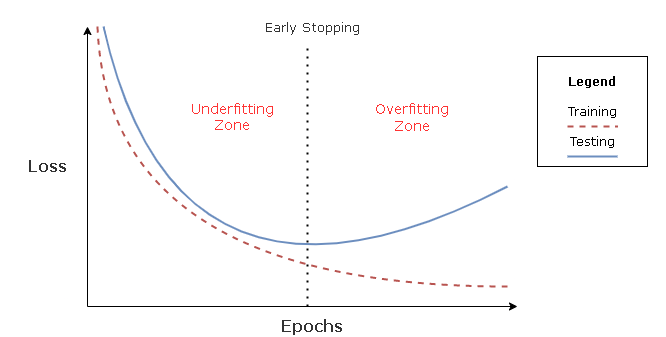

https://towardsdatascience.com/the-million-dollar-question-when-to-stop-training-deep-learning-models-fa9b488ac04d

In [157]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [158]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 70s 42ms/step - loss: 1.4224 - accuracy: 0.4864 - val_loss: 1.1229 - val_accuracy: 0.5984
Epoch 2/50
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0578 - accuracy: 0.6245 - val_loss: 0.9849 - val_accuracy: 0.6517
Epoch 3/50
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9105 - accuracy: 0.6794 - val_loss: 1.0289 - val_accuracy: 0.6389
Epoch 4/50
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8192 - accuracy: 0.7114 - val_loss: 0.9076 - val_accuracy: 0.6850
Epoch 5/50
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7436 - accuracy: 0.7378 - val_loss: 0.9037 - val_accuracy: 0.6876
Epoch 6/50
1563/1563 [==============================] - 59s 38ms/step - loss: 0.6708 - accuracy: 0.7632 - val_loss: 0.8870 - val_accuracy: 0.7023
Epoch 7/50
1563/1563 [==============================] - 73s 47ms/step - loss: 0.6129 - accuracy: 0.7812 - val_loss: 0.8839 -

In [159]:
model.metrics_names

['loss', 'accuracy']

In [160]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.422,0.486,1.123,0.598
1,1.058,0.625,0.985,0.652
2,0.911,0.679,1.029,0.639
3,0.819,0.711,0.908,0.685
4,0.744,0.738,0.904,0.688


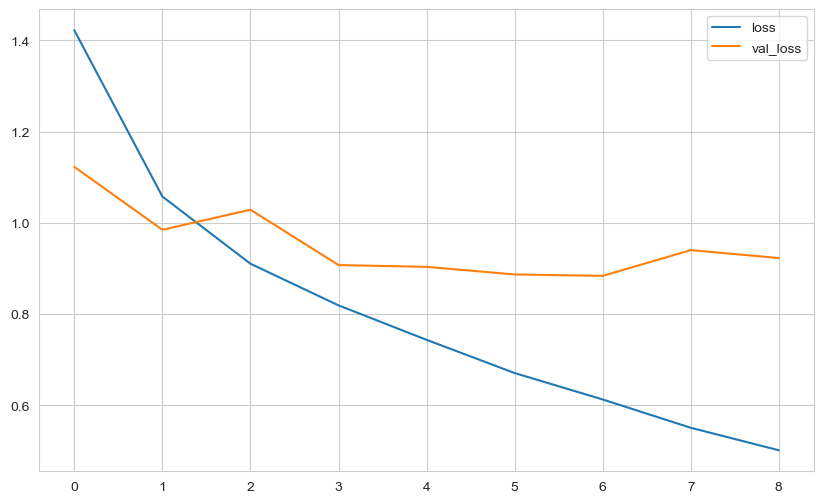

In [161]:
summary[["loss", "val_loss"]].plot();

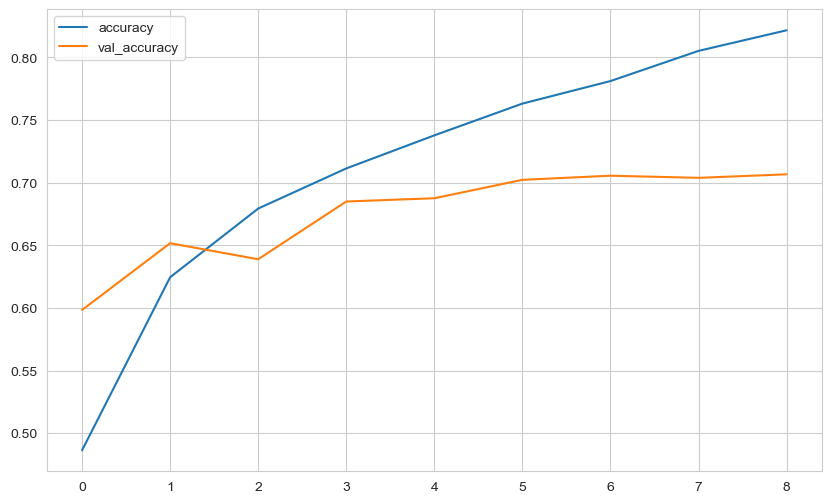

In [162]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [163]:
from sklearn.metrics import classification_report, confusion_matrix

In [164]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.8839 - accuracy: 0.7056


[0.8838948011398315, 0.7056000232696533]

In [165]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8838948011398315
Test accuracy: 0.7056000232696533


In [166]:
pred_prob = model.predict(X_test)

In [167]:
y_pred = np.argmax(pred_prob, axis=1)

In [168]:
y_pred

array([3, 8, 0, ..., 2, 4, 7], dtype=int64)

In [169]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      1000
           1       0.82      0.83      0.82      1000
           2       0.63      0.57      0.60      1000
           3       0.48      0.55      0.51      1000
           4       0.74      0.58      0.65      1000
           5       0.56      0.63      0.59      1000
           6       0.79      0.75      0.77      1000
           7       0.78      0.77      0.78      1000
           8       0.80      0.82      0.81      1000
           9       0.80      0.78      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



In [170]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [50]:
print(confusion_matrix(y_test, y_pred))

[[776  12  32  20  11  11  14  11  74  39]
 [ 36 747   8   9   0   6  10   3  36 145]
 [ 73   7 553  70  89  74  85  23  15  11]
 [ 19   8  67 476  64 200  97  23  26  20]
 [ 28   6  88  43 639  53  77  51  11   4]
 [ 16   4  50 149  44 656  31  24  16  10]
 [  4   1  43  57  24  23 832   2  10   4]
 [ 20   3  37  27  74  87  13 717   2  20]
 [ 80  28  11  12   3  10   6   5 818  27]
 [ 32  50   8  15   3   8   6  15  34 829]]


<AxesSubplot:>

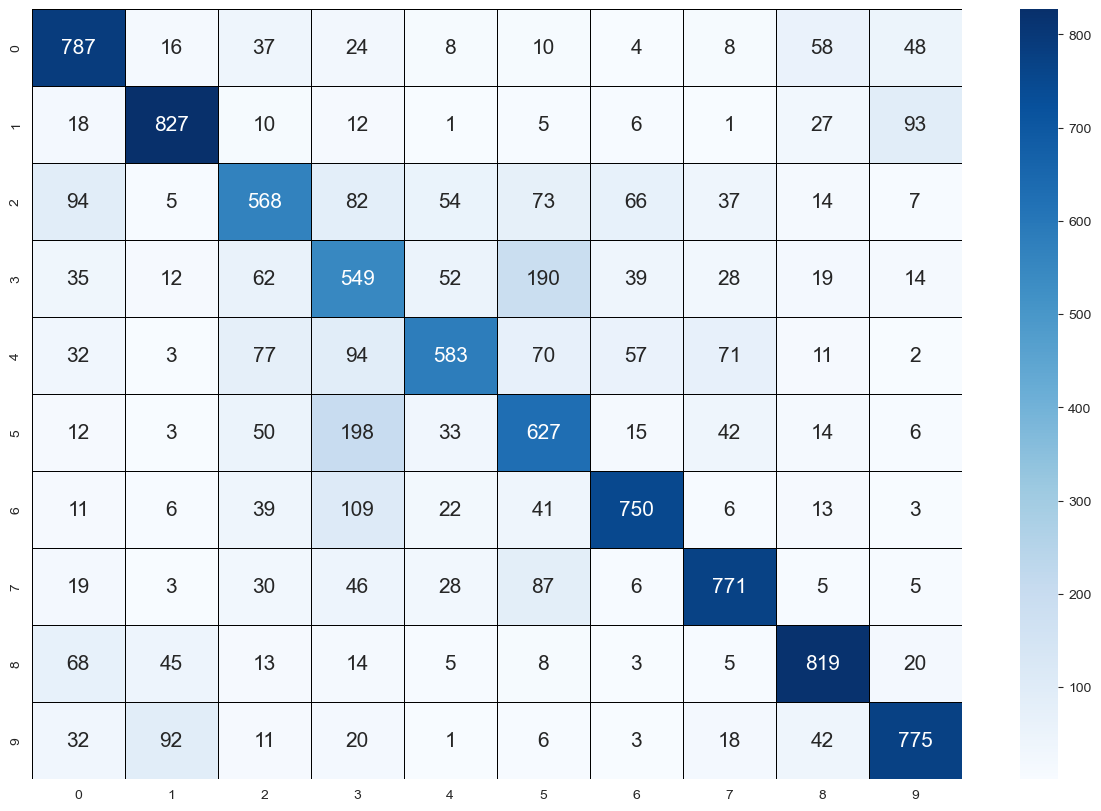

In [171]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

# Modelling-2

In [172]:
model= Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3), padding='same'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
    
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
        
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

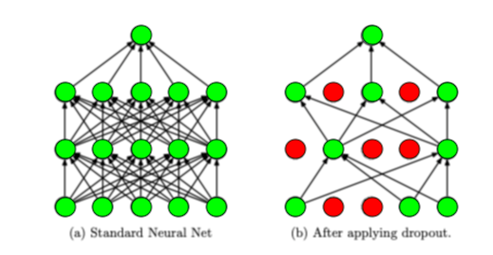

https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/

https://medium.com/analytics-vidhya/a-simple-introduction-to-dropout-regularization-with-code-5279489dda1e

In [173]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)        

In [174]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 232s 148ms/step - loss: 1.4770 - accuracy: 0.4615 - val_loss: 1.1498 - val_accuracy: 0.5866
Epoch 2/50
1563/1563 [==============================] - 235s 150ms/step - loss: 1.0600 - accuracy: 0.6254 - val_loss: 0.9550 - val_accuracy: 0.6736
Epoch 3/50
1563/1563 [==============================] - 303s 194ms/step - loss: 0.9107 - accuracy: 0.6803 - val_loss: 0.8731 - val_accuracy: 0.6944
Epoch 4/50
1563/1563 [==============================] - 262s 168ms/step - loss: 0.8337 - accuracy: 0.7075 - val_loss: 0.8198 - val_accuracy: 0.7268
Epoch 5/50
1563/1563 [==============================] - 242s 155ms/step - loss: 0.7742 - accuracy: 0.7275 - val_loss: 0.7758 - val_accuracy: 0.7361
Epoch 6/50
1563/1563 [==============================] - 238s 152ms/step - loss: 0.7286 - accuracy: 0.7430 - val_loss: 0.7638 - val_accuracy: 0.7377
Epoch 7/50
1563/1563 [==============================] - 215s 138ms/step - loss: 0.6843 - accuracy: 0.7595 - val_

In [55]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.454,0.472,1.118,0.604
1,1.047,0.631,0.921,0.676
2,0.912,0.678,0.850,0.706
3,0.824,0.712,0.828,0.714
4,0.772,0.730,0.772,0.738


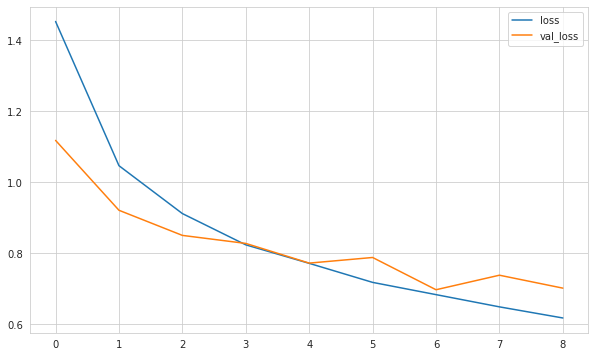

In [56]:
summary[["loss", "val_loss"]].plot();

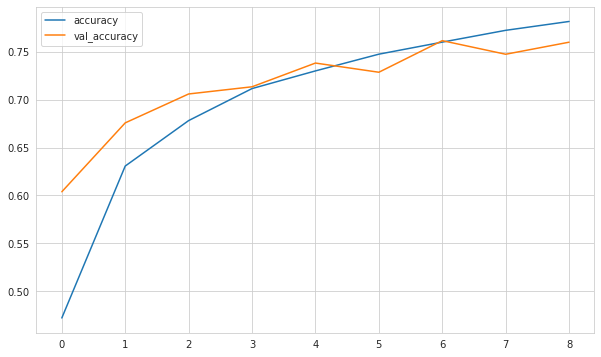

In [57]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [58]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6972 - accuracy: 0.7617


[0.6971675157546997, 0.7616999745368958]

In [59]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6971675157546997
Test accuracy: 0.7616999745368958


In [60]:
pred_prob = model.predict(X_test)

In [61]:
y_pred = np.argmax(pred_prob, axis=1)

In [62]:
y_pred

array([3, 8, 8, ..., 5, 4, 7])

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78      1000
           1       0.91      0.86      0.89      1000
           2       0.72      0.56      0.63      1000
           3       0.58      0.51      0.54      1000
           4       0.72      0.73      0.73      1000
           5       0.62      0.74      0.68      1000
           6       0.77      0.87      0.82      1000
           7       0.88      0.77      0.82      1000
           8       0.86      0.87      0.87      1000
           9       0.82      0.88      0.85      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



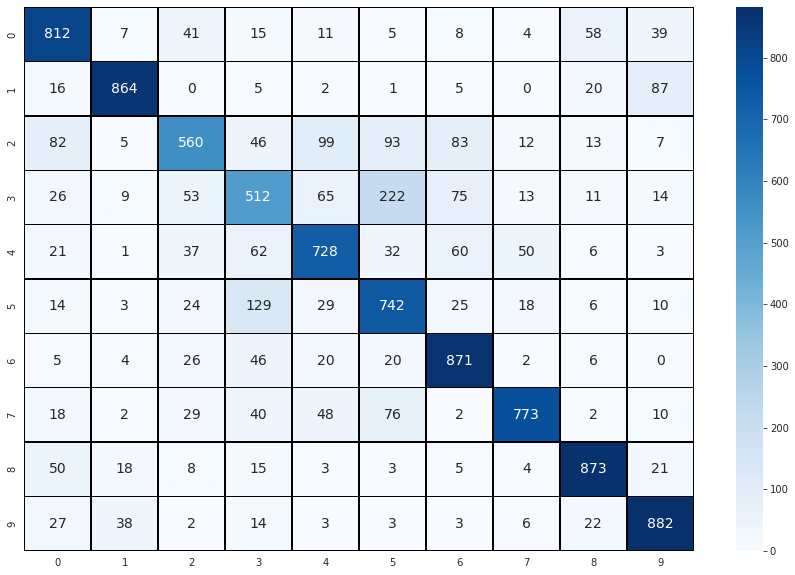

In [64]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

In [65]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

# Modelling-3

In [66]:
from tensorflow.keras.layers import BatchNormalization

**BatchNormalization**

- Layer that normalizes its inputs.
- Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.
    - Technique for training very deep neural networks.
    - Standardizes the inputs to a layer for each mini-batch.
    - Stabilizes the learning process,
    - Reduces the number of training epochs.
![BN1.PNG](https://miro.medium.com/max/709/0*2qZOVh96GZ-a_XdS.png)
![BN2.PNG](https://cesarlaurent.files.wordpress.com/2015/04/bn.png)
![BN3.PNG](https://3.bp.blogspot.com/-ogeLSVo_Tek/WNPS4Glmd4I/AAAAAAAAKBo/bfp-KUSsFmQGolE0uNEeWFzDXA8IPU75wCLcB/s1600/Screenshot%2Bfrom%2B2017-03-23%2B21-50-33.png)

In [67]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/

https://towardsdatascience.com/batch-normalisation-in-deep-neural-network-ce65dd9e8dbf#:~:text=Batch%20normalization%20is%20a%20technique,to%20train%20deep%20neural%20networks.

https://www.analyticsvidhya.com/blog/2021/03/introduction-to-batch-normalization/

In [68]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [69]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 19s 10ms/step - loss: 1.9525 - accuracy: 0.2973 - val_loss: 2.4753 - val_accuracy: 0.2649
Epoch 2/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4456 - accuracy: 0.4781 - val_loss: 1.3565 - val_accuracy: 0.5138
Epoch 3/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2389 - accuracy: 0.5699 - val_loss: 1.7622 - val_accuracy: 0.4480
Epoch 4/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1034 - accuracy: 0.6255 - val_loss: 0.8493 - val_accuracy: 0.6989
Epoch 5/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0175 - accuracy: 0.6595 - val_loss: 0.7951 - val_accuracy: 0.7248
Epoch 6/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9462 - accuracy: 0.6845 - val_loss: 0.7470 - val_accuracy: 0.7439
Epoch 7/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8854 - accuracy: 0.7083 - val_loss: 0.7852 -

In [70]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.952,0.297,2.475,0.265
1,1.446,0.478,1.357,0.514
2,1.239,0.570,1.762,0.448
3,1.103,0.626,0.849,0.699
4,1.018,0.659,0.795,0.725


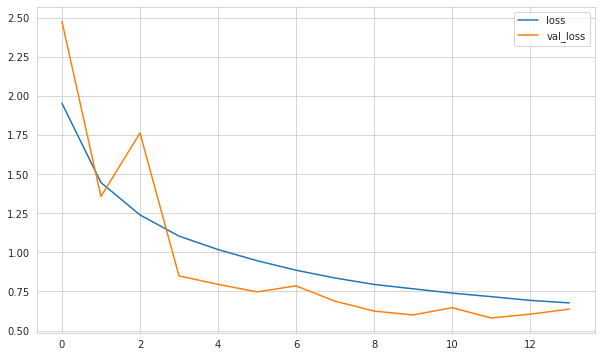

In [71]:
summary[["loss", "val_loss"]].plot();

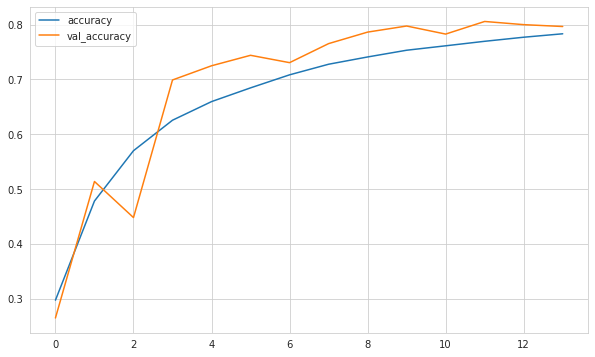

In [72]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [73]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.5801 - accuracy: 0.8056


[0.580125629901886, 0.8055999875068665]

In [74]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.580125629901886
Test accuracy: 0.8055999875068665


In [75]:
pred_prob = model.predict(X_test)

In [76]:
y_pred = np.argmax(pred_prob, axis=1)

In [77]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1000
           1       0.94      0.88      0.91      1000
           2       0.77      0.66      0.71      1000
           3       0.64      0.61      0.62      1000
           4       0.79      0.77      0.78      1000
           5       0.69      0.75      0.72      1000
           6       0.77      0.91      0.84      1000
           7       0.89      0.81      0.85      1000
           8       0.90      0.91      0.91      1000
           9       0.82      0.94      0.88      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.80     10000
weighted avg       0.81      0.81      0.80     10000



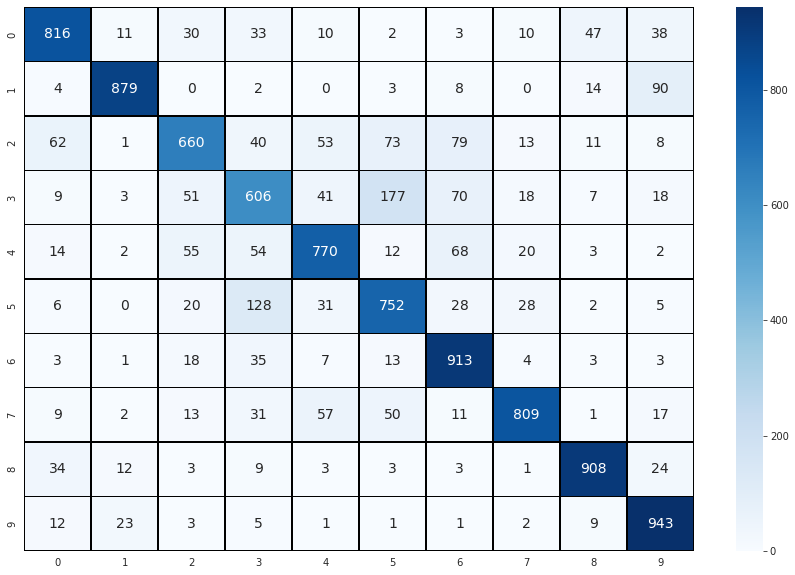

In [79]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

# Prediction

In [80]:
my_image = X_test[44]

In [81]:
my_image.shape

(32, 32, 3)

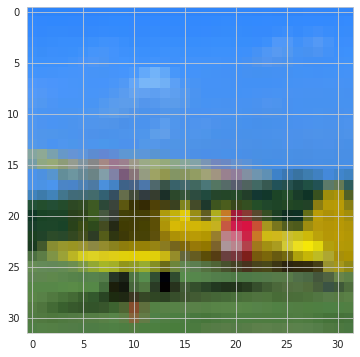

In [82]:
plt.imshow(my_image)

In [83]:
image_prediction = model.predict(my_image.reshape(1,32,32,3))

In [84]:
image_prediction

array([[9.9702603e-01, 1.9080371e-04, 7.3195226e-04, 4.6003388e-05,
        2.4412223e-04, 9.5220885e-06, 1.1327554e-05, 1.7846673e-04,
        1.2627217e-03, 2.9910135e-04]], dtype=float32)

In [85]:
np.argmax(image_prediction, axis=1)

array([0])

In [86]:
result=np.argmax(image_prediction, axis=1)

In [87]:
result

array([0])

In [88]:
classes[int(result)]

'airplane'

In [89]:
model.save("cnn-1.h5")

In [90]:
#finished

In [91]:
model=tf.keras.models.load_model('cnn-1.h5')

In [92]:
X_test[15].shape

(32, 32, 3)

In [93]:
np.expand_dims(X_test[15],axis=0).shape

(1, 32, 32, 3)

In [94]:
pred=model.predict(np.expand_dims(X_test[15],axis=0))

In [95]:
np.argmax(pred)

8

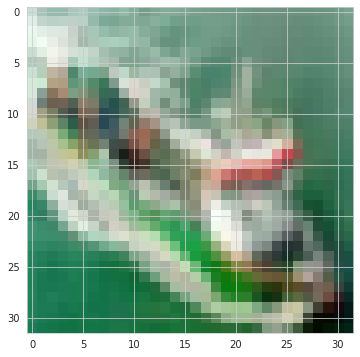

In [96]:
plt.imshow(X_test[15])

In [97]:
classes[8]

'ship'